# Stock Market Analysis And Forecasting
A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment in the stock market is most often done via stockbrokerages and electronic trading platforms. Investment is usually made with an investment strategy in mind.

The task of stock prediction has always been a challenging problem for statistics experts and finance. The main reason behind this prediction is buying stocks that are likely to increase in price and then selling stocks that are probably to fall. Generally, there are two ways for stock market prediction.

Fundamental analysis is one of them and relies on a company's technique and fundamental information like market position, expenses and annual growth rates. The second one is the technical analysis method, which concentrates on previous stock prices and values.

In the first part of our project, we will try to analyze the data. and in the second part, we will forecast the stock market.

## Dataset
We will be using stock data from 2006-2018 for the following publicly traded companies:
 1. Google
 2. Microsoft
 3. IBM
 4. Amazon

## Analysis
We will find the distribution of close and open. Then we will find the correlation between close and open. After that, we will visualize the attributes [Open, High, Low, Close, volume] of our datasets. Then we compare the "High" and "Close" of each datasets. At last, we will find the trend and seasonality in the dataset.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import time, math, pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn

# Prediction

## Time Series Forecasting:
Time series forecasting uses information regarding historical values and associated patterns to predict future activity. Most often, this relates to trend analysis, cyclical fluctuation analysis, and issues of seasonality. As with all forecasting methods, success is not guaranteed.


# GRU Model:
Gated recurrent unit  is essentially a simplified LSTM. It has
the exact same role in the network. The main difference is in the number of
gates and weights — GRU is somewhat simpler. It has 2 gates. Since it does
not have an output gate, there is no control over the memory content. The
update gate controls the information flow from the previous activation, and
the addition of new information as well, while the reset gate is inserted
into the candidate activation.

<img src='https://d2l.ai/_images/gru-1.svg' />

By using GRU time series forecasting we will forcast and check.

In [2]:
filepath = './data/AMZN_2006-01-01_to_2018-01-01.csv'
data_amazon = pd.read_csv(filepath)
data_amazon = data_amazon.sort_values('Date')
data_amazon.head()


,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


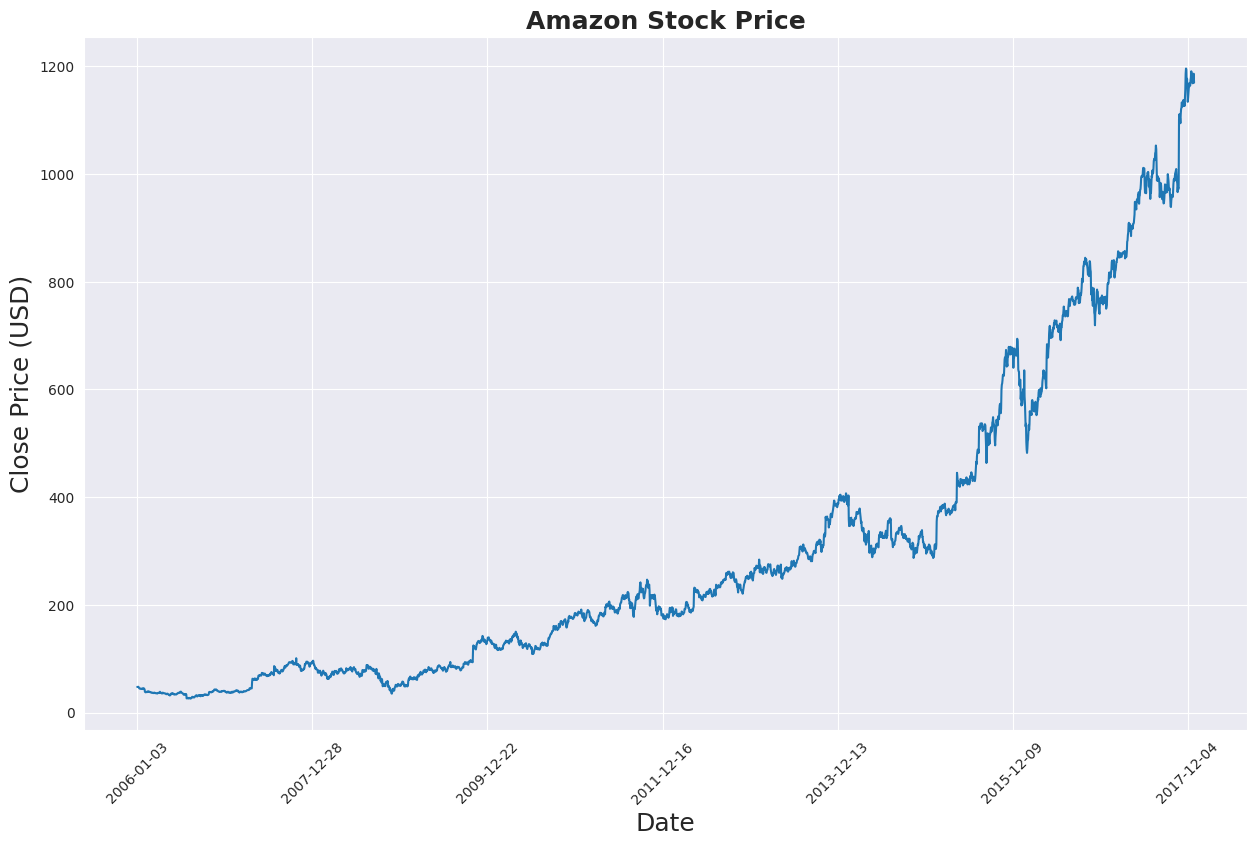

In [3]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_amazon[['Close']])
plt.xticks(range(0,data_amazon.shape[0],500),data_amazon['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [4]:
filepath = './data/GOOGL_2006-01-01_to_2018-01-01.csv'
data_google = pd.read_csv(filepath)
data_google = data_google.sort_values('Date')
data_google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


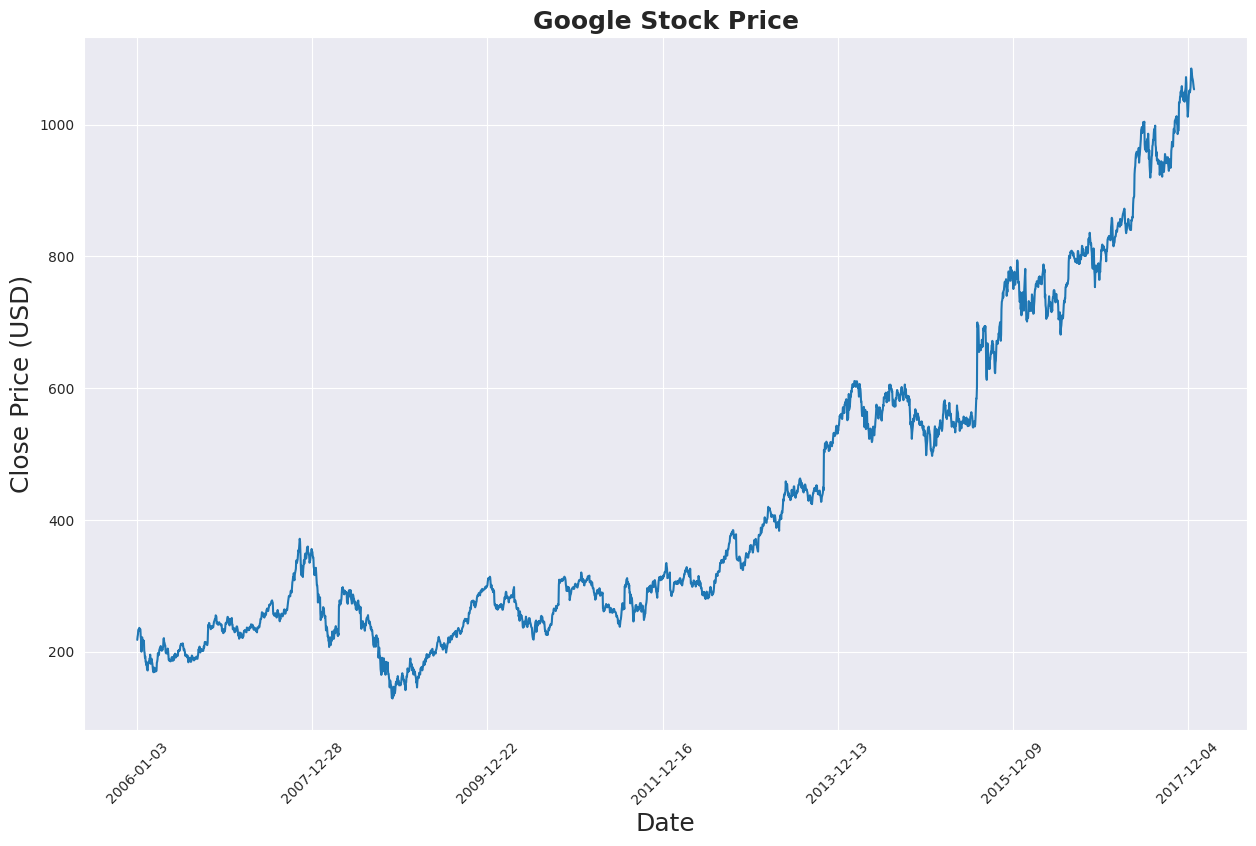

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_google[['Close']])
plt.xticks(range(0,data_google.shape[0],500),data_google['Date'].loc[::500],rotation=45)
plt.title("Google Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [6]:
filepath = './data/IBM_2006-01-01_to_2018-01-01.csv'
data_ibm = pd.read_csv(filepath)
data_ibm = data_ibm.sort_values('Date')
data_ibm.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [7]:
data_ibm.dropna(inplace=True)

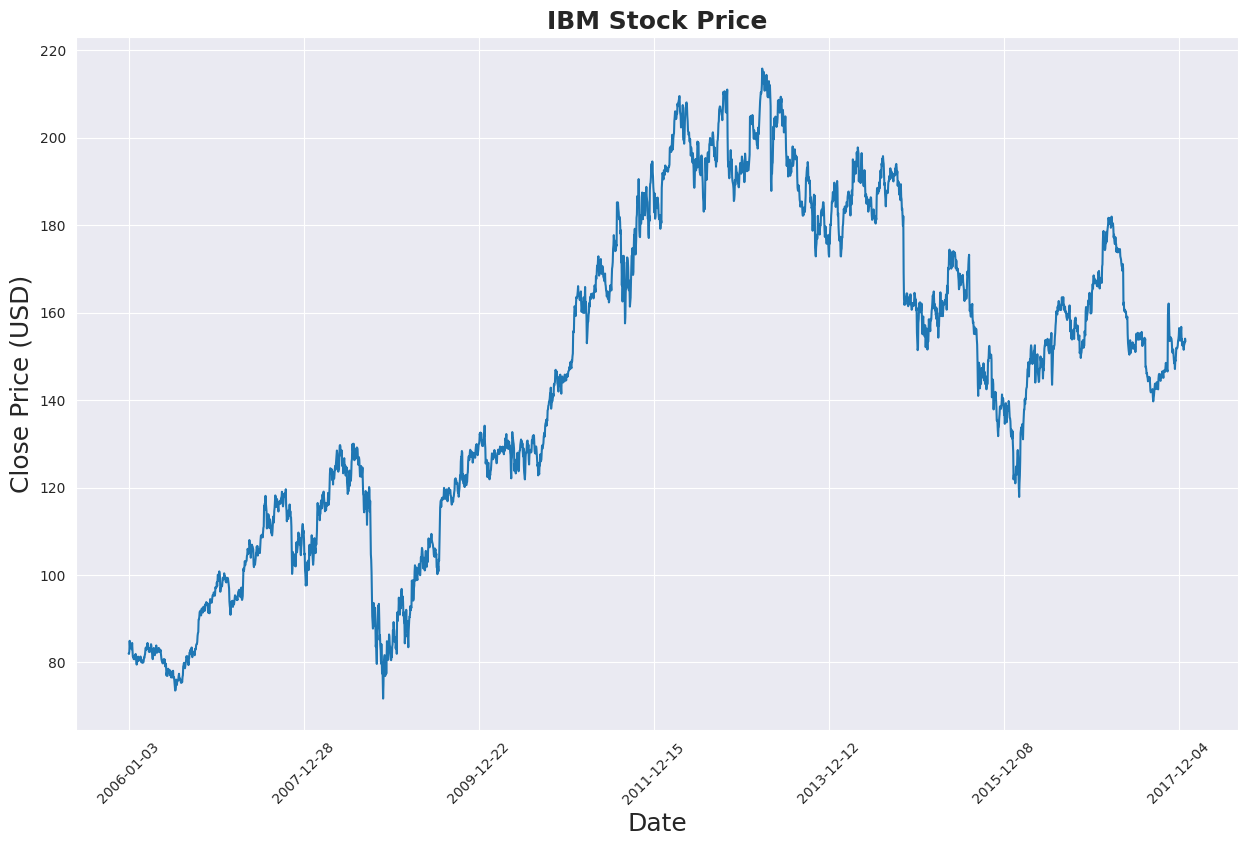

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_ibm[['Close']])
plt.xticks(range(0,data_ibm.shape[0],500),data_ibm['Date'].loc[::500],rotation=45)
plt.title("IBM Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [9]:
filepath = './data/MSFT_2006-01-01_to_2018-01-01.csv'
data_microsoft = pd.read_csv(filepath)
data_microsoft = data_microsoft.sort_values('Date')
data_microsoft.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT


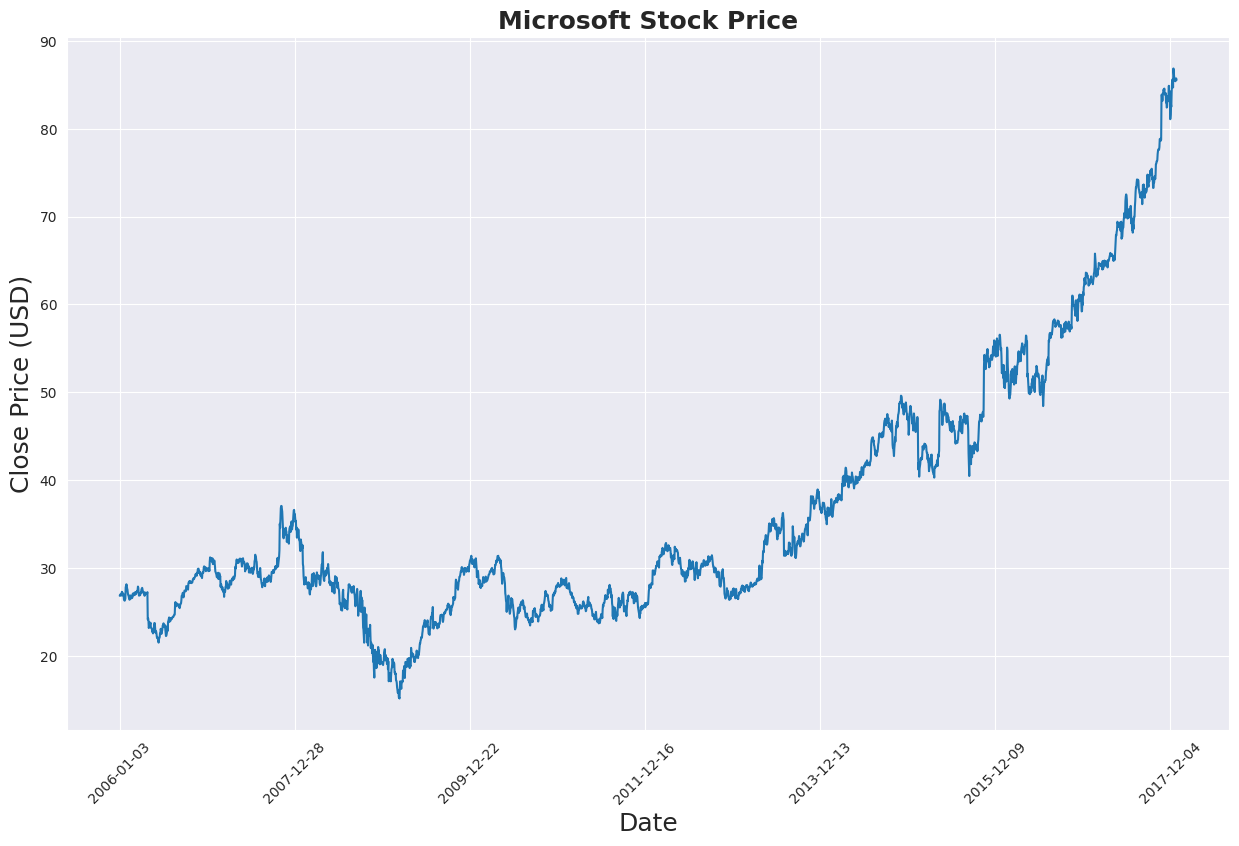

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data_microsoft[['Close']])
plt.xticks(range(0,data_microsoft.shape[0],500),data_microsoft['Date'].loc[::500],rotation=45)
plt.title("Microsoft Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [11]:
# GRU Model Class
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [12]:
def split_data(stock, lookback):
    data_raw = np.array(stock) # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    X_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    X_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [X_train, y_train, X_test, y_test]

In [13]:
price_amazon = data_amazon['Close']
price_amazon

0         47.58
1         47.25
2         47.65
3         47.87
4         47.08
         ...   
3014    1168.36
3015    1176.76
3016    1182.26
3017    1186.10
3018    1169.47
Name: Close, Length: 3019, dtype: float64

In [14]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price_amazon = scaler.fit_transform(price_amazon.values.reshape(-1,1))

In [15]:
lookback = 20 # choose sequence length
X_train, y_train, X_test, y_test = split_data(price_amazon, lookback)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
X_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [16]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [17]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [18]:
model = GRU(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, num_layers = num_layers)
criterion = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam(model.parameters(), lr = 0.01)

In [19]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(X_train)

    loss = criterion(y_train_pred, y_train_gru)
    # print(f"Epoch {t}, MSE: {loss.item()}")
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time() - start_time    
print(f"MSE: {hist[-1]}")
print(f"Training time: {training_time}")

MSE: 9.218840568792075e-05
Training time: 8.88640832901001


In [20]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

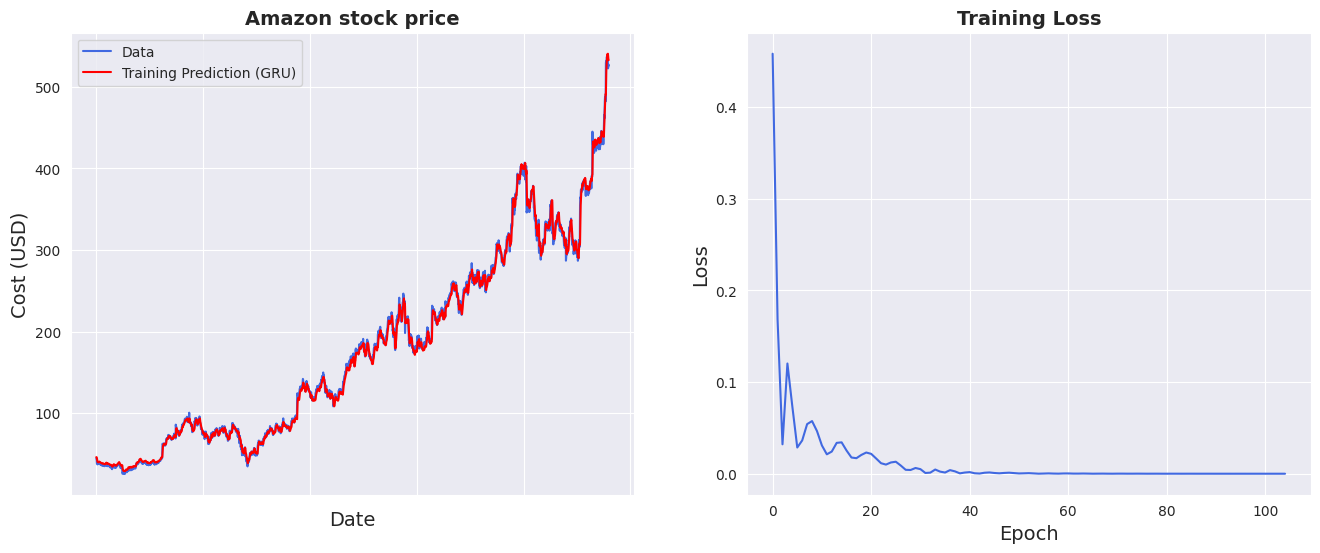

In [21]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='red')
ax.set_title('Amazon stock price', size = 14, fontweight='bold')
ax.set_xlabel("Date", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [22]:
# make predictions
y_test_pred = model(X_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train MSE Score: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test MSE Score: %.2f' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)
amazon_scores = gru.copy()

Train MSE Score: 5.62
Test MSE Score: 46.64


In [23]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_amazon)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_amazon)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_amazon)-1, :] = y_test_pred

original = scaler.inverse_transform(price_amazon.reshape(-1,1))

predictions = data_amazon.loc[:,'Date'].to_numpy().reshape(-1,1)
predictions = np.append(predictions, trainPredictPlot, axis = 1)
predictions = np.append(predictions, testPredictPlot, axis = 1)
predictions = np.append(predictions, original, axis = 1)
result = pd.DataFrame(predictions, columns = ['Date', 'Train Prediction', 'Test Prediction', 'Actual Value'])
amazon_predictions = result.copy()

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Train Prediction'],
                    mode='lines',
                    name='Train Prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result['Test Prediction'],
                    mode='lines',
                    name='Test Prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Actual Value'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=1
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=1,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'
)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Amazon Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

In [25]:
price_google = data_google['Close']
price_google.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3019 entries, 0 to 3018
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [26]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price_google = scaler.fit_transform(price_google.values.reshape(-1,1))

In [27]:
lookback = 20 # choose sequence length
X_train, y_train, X_test, y_test = split_data(price_google, lookback)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
X_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [28]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [29]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(X_train)

    loss = criterion(y_train_pred, y_train_gru)
    # print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

print(f"MSE: {loss.item()}")
training_time = time.time()-start_time    
print(f"Training time: {training_time}")

MSE: 0.0002162077435059473
Training time: 8.140745878219604


In [31]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

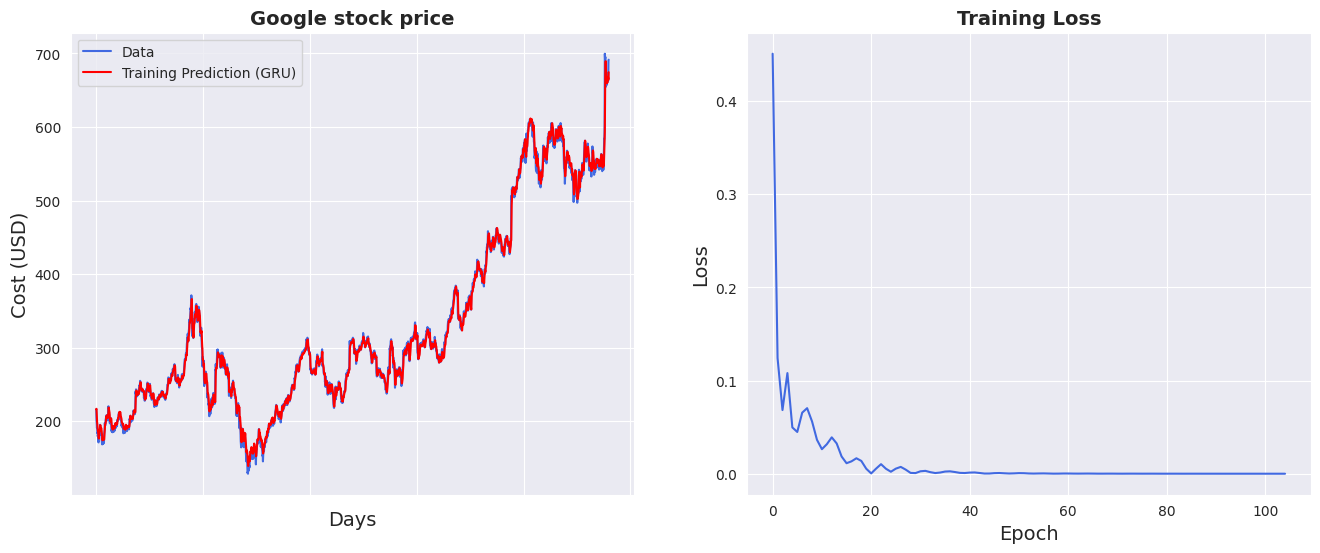

In [32]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='red')
ax.set_title('Google stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [33]:
# make predictions
y_test_pred = model(X_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train MSE Score: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test MSE Score: %.2f' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)
google_scores = gru.copy()

Train MSE Score: 7.03
Test MSE Score: 36.81


In [34]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_google)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_google)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_google)-1, :] = y_test_pred

original = scaler.inverse_transform(price_google.reshape(-1,1))

predictions = data_google.loc[:,'Date'].to_numpy().reshape(-1,1)
predictions = np.append(predictions, trainPredictPlot, axis = 1)
predictions = np.append(predictions, testPredictPlot, axis = 1)
predictions = np.append(predictions, original, axis = 1)
result = pd.DataFrame(predictions, columns = ['Date', 'Train Prediction', 'Test Prediction', 'Actual Value'])
google_predictions = result.copy()

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Train Prediction'],
                    mode='lines',
                    name='Train Prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result['Test Prediction'],
                    mode='lines',
                    name='Test Prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Actual Value'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Google Stock Result',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

In [36]:
price_ibm = data_ibm['Close']
price_ibm.info()

<class 'pandas.core.series.Series'>
Index: 3019 entries, 0 to 3019
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [37]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price_ibm = scaler.fit_transform(price_ibm.values.reshape(-1,1))

In [38]:
lookback = 20 # choose sequence length
X_train, y_train, X_test, y_test = split_data(price_ibm, lookback)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
X_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [39]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [40]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [41]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [42]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(X_train)

    loss = criterion(y_train_pred, y_train_gru)
    # print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

print(f"MSE: {loss.item()}")
training_time = time.time()-start_time    
print(f"Training time: {training_time}")

MSE: 0.0008067784365266562
Training time: 8.131889820098877


In [43]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

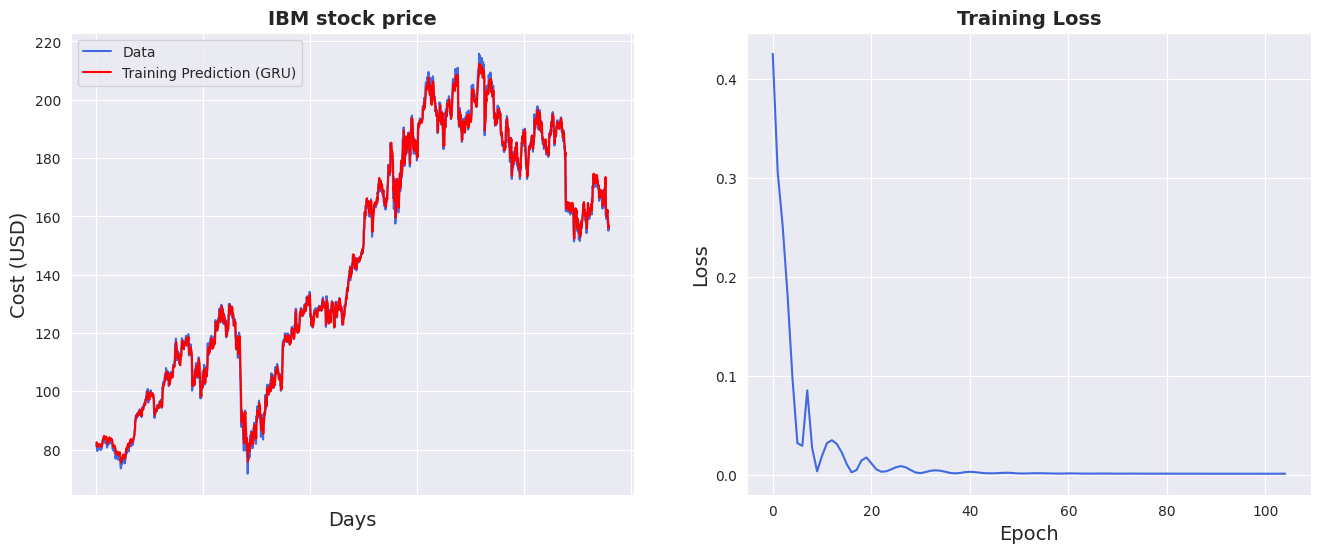

In [44]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='red')
ax.set_title('IBM stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [45]:
# make predictions
y_test_pred = model(X_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train MSE Score: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test MSE Score: %.2f' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)
ibm_scores = gru.copy()

Train MSE Score: 2.05
Test MSE Score: 1.94


In [46]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_ibm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_ibm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_ibm)-1, :] = y_test_pred

original = scaler.inverse_transform(price_ibm.reshape(-1,1))

predictions = data_ibm.loc[:,'Date'].to_numpy().reshape(-1,1)
predictions = np.append(predictions, trainPredictPlot, axis = 1)
predictions = np.append(predictions, testPredictPlot, axis = 1)
predictions = np.append(predictions, original, axis = 1)
result = pd.DataFrame(predictions, columns = ['Date', 'Train Prediction', 'Test Prediction', 'Actual Value'])
ibm_predictions = result.copy()

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Train Prediction'],
                    mode='lines',
                    name='Train Prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result['Test Prediction'],
                    mode='lines',
                    name='Test Prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Actual Value'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=2
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'

)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='IBM Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [48]:
price_microsoft = data_microsoft['Close']
price_microsoft.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3019 entries, 0 to 3018
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [49]:
scaler = MinMaxScaler(feature_range=(-1, 1))
price_microsoft = scaler.fit_transform(price_microsoft.values.reshape(-1,1))

In [50]:
lookback = 20 # choose sequence length
X_train, y_train, X_test, y_test = split_data(price_microsoft, lookback)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
X_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [51]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [52]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 105

In [53]:
model = GRU(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [54]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(X_train)

    loss = criterion(y_train_pred, y_train_gru)
    # print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

print(f"MSE: {hist[-1]}")
training_time = time.time()-start_time    
print(f"Training time: {training_time}")

MSE: 0.00026080015231855214
Training time: 8.244780778884888


In [55]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))

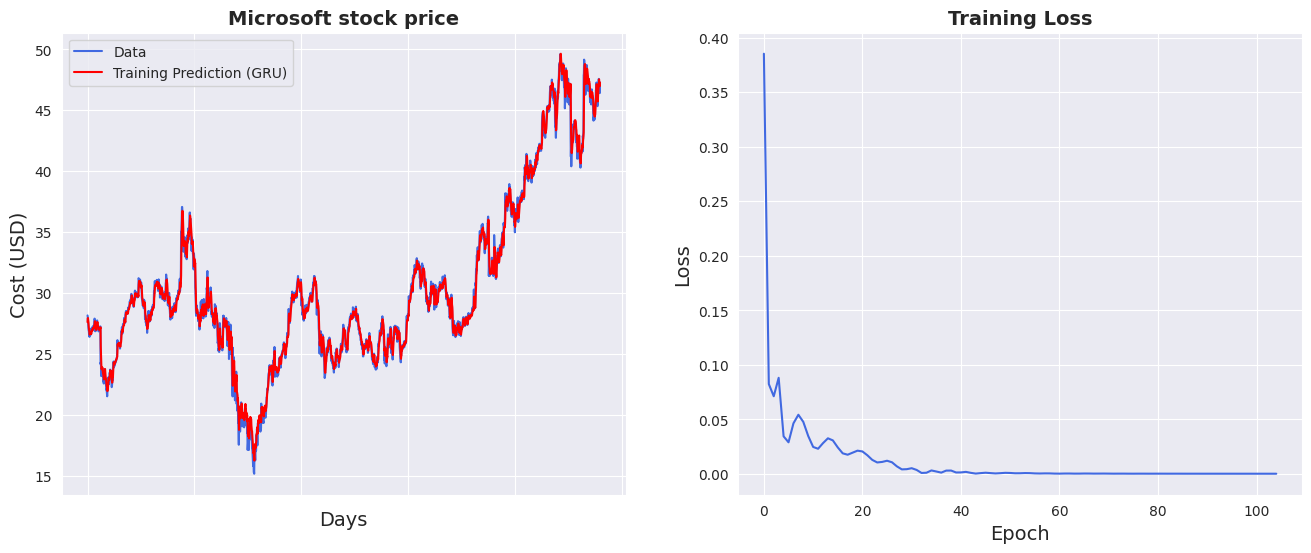

In [56]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='red')
ax.set_title('Microsoft stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [57]:
# make predictions
y_test_pred = model(X_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train MSE Score: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test MSE Score: %.2f' % (testScore))
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)
microsoft_scores = gru.copy()

Train MSE Score: 0.58
Test MSE Score: 1.84


In [58]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(price_microsoft)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_microsoft)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(price_microsoft)-1, :] = y_test_pred

original = scaler.inverse_transform(price_microsoft.reshape(-1,1))

predictions = data_microsoft.loc[:,'Date'].to_numpy().reshape(-1,1)
predictions = np.append(predictions, trainPredictPlot, axis = 1)
predictions = np.append(predictions, testPredictPlot, axis = 1)
predictions = np.append(predictions, original, axis = 1)
result = pd.DataFrame(predictions, columns = ['Date', 'Train Prediction', 'Test Prediction', 'Actual Value'])
microsoft_predictions = result.copy()

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Train Prediction'],
                    mode='lines',
                    name='Train prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result['Test Prediction'],
                    mode='lines',
                    name='Test Prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Actual Value'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=1
    ),
    yaxis=dict(
        title_text='Close (USD)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=1,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'
)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Microsoft Stock Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [60]:
# Save model to file
model_file = open('stock_market_model.pkl', 'wb')
pickle.dump(amazon_predictions, model_file)
pickle.dump(amazon_scores, model_file)
pickle.dump(google_predictions, model_file)
pickle.dump(google_scores, model_file)
pickle.dump(ibm_predictions, model_file)
pickle.dump(ibm_scores, model_file)
pickle.dump(microsoft_predictions, model_file)
pickle.dump(microsoft_scores, model_file)
model_file.close()